In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
gol_df = data.DataReader(name='GOLL4.SA', data_source='yahoo', start='2015-01-01')

In [6]:
gol_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,15.20,14.61,14.97,14.99,901900.0,14.99
2015-01-05,15.01,14.41,14.90,14.85,1272500.0,14.85
2015-01-06,15.21,14.65,14.75,15.21,2183500.0,15.21
2015-01-07,15.33,14.55,15.15,14.55,1846900.0,14.55
2015-01-08,14.65,14.20,14.41,14.27,1569500.0,14.27


In [7]:
gol_df.shape

(1591, 6)

In [8]:
gol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1591 entries, 2015-01-02 to 2021-06-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1591 non-null   float64
 1   Low        1591 non-null   float64
 2   Open       1591 non-null   float64
 3   Close      1591 non-null   float64
 4   Volume     1591 non-null   float64
 5   Adj Close  1591 non-null   float64
dtypes: float64(6)
memory usage: 87.0 KB


In [9]:
gol_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-28,27.379999,26.350000,27.379999,26.590000,7060100.0,26.590000
2021-05-31,26.870001,26.420000,26.780001,26.809999,2414700.0,26.809999
2021-06-01,27.510000,26.370001,27.400000,26.450001,7675200.0,26.450001
2021-06-02,27.209999,26.190001,26.500000,27.030001,5790300.0,27.030001
2021-06-04,27.150000,26.410000,27.000000,26.480000,8019100.0,26.480000


In [10]:
gol_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1591.000000,1591.000000,1591.000000,1591.000000,1.591000e+03,1591.000000
mean,15.791842,15.007203,15.408259,15.375462,4.921155e+06,15.375462
std,10.309108,9.920906,10.116365,10.114221,4.904006e+06,10.114221
min,1.180000,1.130000,1.160000,1.160000,0.000000e+00,1.160000
25%,7.585000,7.235000,7.425000,7.355000,1.873900e+06,7.355000
50%,13.760000,12.830000,13.400000,13.250000,3.210900e+06,13.250000
75%,23.235000,22.040000,22.565000,22.630000,6.233600e+06,22.630000
max,44.619999,41.310001,43.669998,43.790001,4.368050e+07,43.790001


In [11]:
gol_df[gol_df['Close'] >= 43.79]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-01,44.619999,41.25,41.25,43.790001,6664200.0,43.790001


In [14]:
gol_df[(gol_df['Close'] >= 1.15) & (gol_df['Close'] <= 1.16)]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-22,1.26,1.14,1.2,1.16,3830600.0,1.16


In [15]:
gol_df.to_csv('gol.csv')

In [16]:
gol = pd.read_csv('./gol.csv')

In [17]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

In [18]:
acoes_df = pd.DataFrame()

In [19]:
for acao in acoes:
    acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']

In [20]:
acoes_df

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.990000,15.200000,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.850000,15.000000,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.210000,14.800000,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.550000,14.670000,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.270000,14.150000,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2021-05-28,26.590000,24.930000,34.400002,20.250000,33.549999,120.720001
2021-05-31,26.809999,24.889999,34.150002,20.160000,34.470001,121.080002
2021-06-01,26.450001,24.719999,34.189999,20.350000,34.040001,123.470001


In [21]:
acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE', 'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

In [22]:
acoes_dfacoes

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,14.990000,15.200000,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.850000,15.000000,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.210000,14.800000,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.550000,14.670000,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.270000,14.150000,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2021-05-28,26.590000,24.930000,34.400002,20.250000,33.549999,120.720001
2021-05-31,26.809999,24.889999,34.150002,20.160000,34.470001,121.080002
2021-06-01,26.450001,24.719999,34.189999,20.350000,34.040001,123.470001


In [24]:
acoes_df.isnull().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    0
dtype: int64

In [25]:
acoes_df.to_csv('acoes.csv')

In [26]:
acoes = pd.read_csv('./acoes.csv')

In [27]:
acoes.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998


In [28]:
acoes.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000
mean,15.375462,31.621010,12.954440,6.305005,14.551185,75.412320
std,10.114221,15.889871,10.443146,7.831663,7.013710,22.279427
min,1.160000,6.106568,4.942307,0.030585,7.156402,36.450001
25%,7.355000,18.085000,6.434615,0.235352,9.884552,55.705000
50%,13.250000,25.000000,8.750000,2.859375,10.912599,73.800003
75%,22.630000,45.725000,12.210000,9.460000,18.193333,94.235001
max,43.790001,64.800003,46.105000,27.450001,34.889999,125.050003


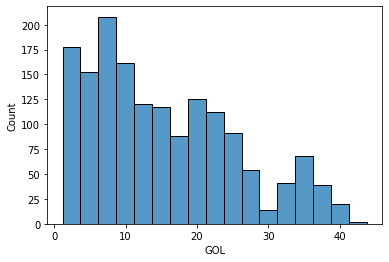

In [33]:
sns.histplot(acoes_df['GOL']);

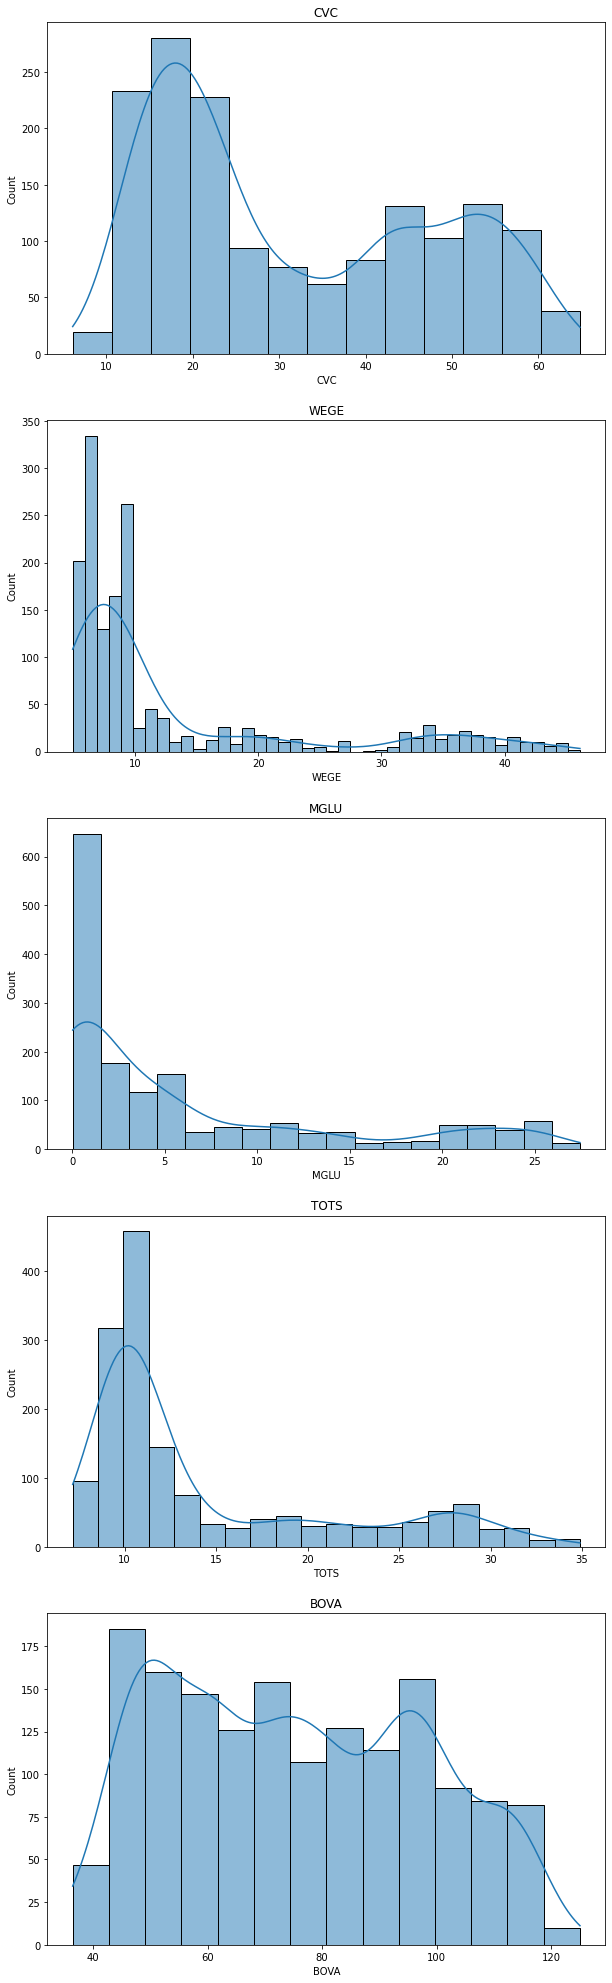

In [35]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
    plt.subplot(7, 1, i + 1)
    sns.histplot(acoes_df[acoes_df.columns[i]], kde=True)
    plt.title(acoes_df.columns[i])

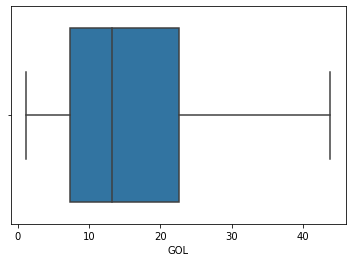

In [37]:
sns.boxplot(x=acoes_df['GOL']);

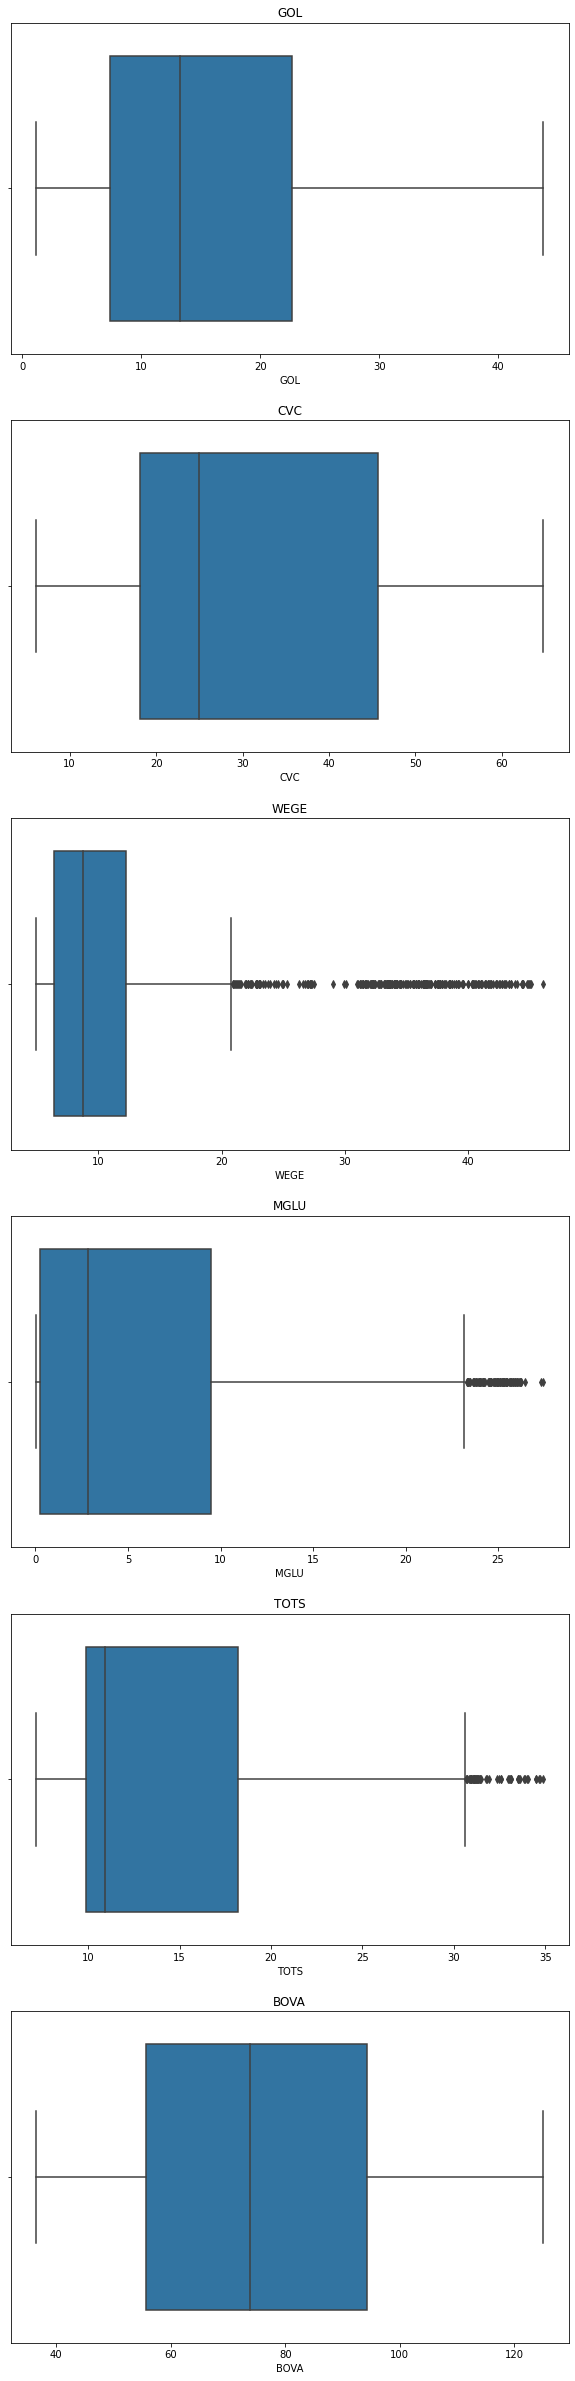

In [40]:
plt.figure(figsize=(10,50))
for i in np.arange(0, len(acoes_df.columns)):
    plt.subplot(7, 1, i + 1)
    sns.boxplot(x=acoes_df[acoes_df.columns[i]])
    plt.title(acoes_df.columns[i])

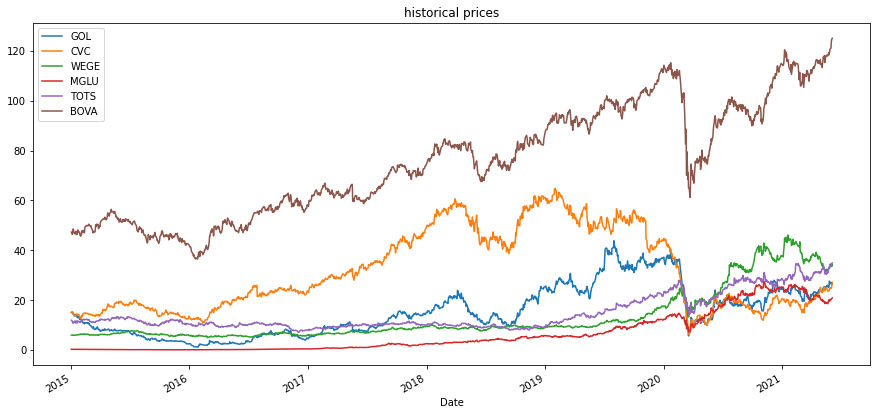

In [72]:
acoes_df.plot(figsize=(15,7), title='historical prices');